In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/admission/Admission_Predict.csv


In [4]:
df = pd.read_csv("/kaggle/input/admission/Admission_Predict.csv")
df.shape

(400, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.duplicated().sum()

0

In [9]:
df.drop("Serial No.", axis =1,inplace =True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
X = df.drop("Chance of Admit ", axis =1)
y= df["Chance of Admit "]

In [13]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=7)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[0.32      , 0.42307692, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.84      , 0.96153846, 0.75      , ..., 0.875     , 0.78205128,
        1.        ],
       [1.        , 1.        , 0.75      , ..., 1.        , 0.86538462,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.875     , 0.8974359 ,
        1.        ],
       [0.32      , 0.42307692, 0.25      , ..., 0.375     , 0.46794872,
        0.        ],
       [0.6       , 0.65384615, 0.75      , ..., 0.625     , 0.66346154,
        1.        ]])

In [17]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(7,activation="relu",input_dim = 7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))#for regression problem the acttivation function is linear


In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = "mean_squared_error",optimizer= "Adam",)


In [34]:
history = model.fit(X_train_scaled,y_train, validation_split=0.2, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 0.6048 - val_loss: 0.5711
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5516 - val_loss: 0.5238
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5005 - val_loss: 0.4771
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4498 - val_loss: 0.4270
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4000 - val_loss: 0.3723
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3453 - val_loss: 0.3145
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2833 - val_loss: 0.2513
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2195 - val_loss: 0.1837
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1538 - val_loss: 0.1215
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1006 - val_loss: 0.0754
Epoch 11/100
8/8 [==========

In [35]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5690736925816537

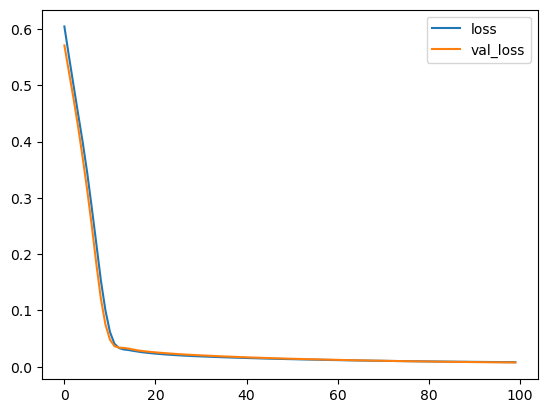

In [37]:
import  matplotlib.pyplot as plt
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()